
<h2>Churn Prediction Challenge</h2>
Challenge: Using data from existing clients, build a model that will predict if a customer is going to churn or not.

<h4>Step1: Importing Packages</h4>

In [2]:
# Import packages
import random
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split #will be used to split the data to train and test


<h4>Step2: Read the dataset</h4>

In [3]:
# Load the churn dataset
#hint:data = pd.read_csv("what is the file location? look at previous examples")
data=pd.read_csv('/content/churn_cleaned.csv')
#data=pd.read_csv('./churn_cleaned.csv')

In [4]:
data.shape

(7032, 21)

In [5]:
#Let's view the first five lines of my dataset
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,1,0,1,1,1,1,0,No,-1,...,-1,-1,-1,-1,One year,0,Mailed check,18.80,18.80,No
1,8992-CEUEN,0,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Electronic check,18.85,18.85,No
2,9318-NKNFC,1,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,1,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,1,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Mailed check,18.90,18.90,No
4,1423-BMPBQ,0,0,1,1,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,1,Mailed check,19.00,19.00,No
5,1015-OWJKI,1,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Mailed check,19.05,19.05,No
6,6569-KTMDU,0,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Mailed check,19.10,19.10,No
7,6121-VZNQB,0,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,1,Mailed check,19.10,19.10,Yes
8,9441-QHEVC,1,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Mailed check,19.10,19.10,No
9,7302-ZHMHP,0,0,0,0,1,1,0,No,-1,...,-1,-1,-1,-1,Month-to-month,0,Mailed check,19.15,19.15,No


<h4>Step3: Identify and Summarize Categorical vs Numeric Features</h4>

In [6]:
#hint: data['column_name'].describe() returns a summary for that column inclduing mean, median, min and max
data.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [7]:
data.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [8]:
#hint: data['column_name'].value_counts() returns the count for every value in that column
data.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [10]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [11]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<h4>Step4: Visualize your Features</h4>

<h5>4a: Visualize Numeric Features</h5>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


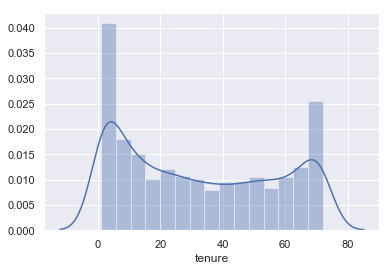

In [12]:
#hint: sns.distplot("Feature") returns the distribution for that feature
sns.distplot(data.tenure)

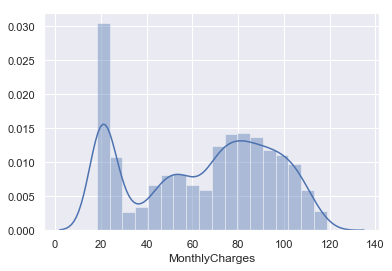

In [13]:
sns.distplot(data.MonthlyCharges)

<h5>4b: Visualize Counts and Boxplots</h5>

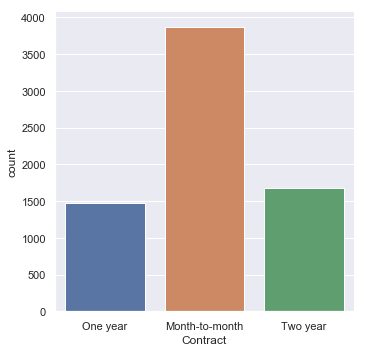

In [14]:
#hint: sns.catplot(x="Feature1", y="Feature2", kind="box", data=data, palette="RdBu") returns a boxplot
#hint: bar = sns.catplot(x="Feature1", kind="count", palette="RdBu", data=data) returns a barplot
sns.catplot(x='Contract',data=data,kind='count')

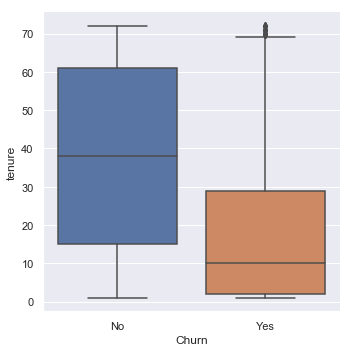

In [15]:
sns.catplot(x='Churn',y='tenure',data=data,kind='box')

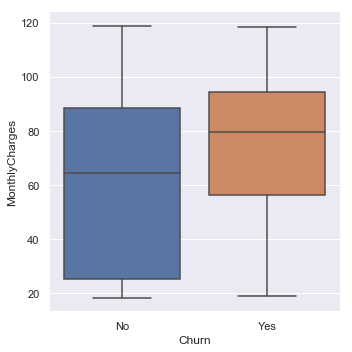

In [16]:
sns.catplot(x='Churn',y='MonthlyCharges',data=data,kind='box')

<h4>Step5: Convert Categorical to Numeric</h4>

In [17]:
#using label enconding
#hint: data.Churn= data.Churn.map({"Yes":1,"No":0})
data.Churn=data.Churn.map({'Yes':1,'No':0})

In [28]:
#using one hot enconding
#hint:data=pd.get_dummies(data, columns=['PaymentMethod'])
data=pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod'])

<h4>Step6: Define your Xs and Y</h4>

In [68]:
#hint y=data.Churn x_features=data.drop(columns=['What columns should we drop?'])


<h4>Step7: Split to Train and Test</h4>

In [50]:
#split the data to train and test
#hint:x_train,x_test,y_train,y_test = train_test_split(x_features,y,test_size=?,random_state=42)


<h4>Step8: Train a Random Forest</h4>

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
#hint:rf_model = RandomForestClassifier(max_depth = ?, n_estimators=?)

# Train
#hint: rf_model.fit(x_train, y_train)



<h4>Step9: Find Important Features</h4>

In [67]:
#hint: rf_model.feature_importances_


<h4>Step10: Assess Model Performance</h4>

In [66]:
#hint: rf_model.score(what do we put here?)


In [69]:
#save the model!
from sklearn.externals import joblib

joblib.dump(rf_model, "churn_classifier.pkl")    #save the whole model into a file to be used later

#to load the model next time we just need to do:
#classifer = joblib.load("model.pkl")
#classifer.predict(newobs)

['churn_classifier.pkl']